In [40]:
##FROM KAGGLE KERNEL##
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from pandas import DataFrame, read_csv

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [41]:
df = pd.read_excel('db_responses.xls') 
dataset = df

cols = list(df)
print(cols)
#pd.read_csv(r"C:\Users\trudi\OneDrive\Desktop\KMUTT ESROP 2019\Smart Home\db_responses.csv")

['Publication (Citation)', 'Data contributor', 'Year', 'Season', 'Climate', 'City', 'Country', 'Building type', 'Cooling strategy', 'Age', 'Sex', 'Thermal sensation', 'Thermal sensation acceptability', 'Thermal preference', 'Air movement acceptability', 'Air movement preference', 'Thermal comfort', 'PMV', 'PPD', 'SET', 'Clo', 'Met', 'activity_10', 'activity_20', 'acitivity_30', 'activity_60', 'Air temperature (°C)', 'Air temperature (°F)', 'Ta_h (°C)', 'Ta_h (°F)', 'Ta_m (°C)', 'Ta_m (°F)', 'Ta_l (°C)', 'Ta_l (°F)', 'Operative temperature (°C)', 'Operative temperature (°F)', 'Radiant temperature (°C)', 'Radiant temperature (°F)', 'Globe temperature (°C)', 'Globe temperature (°F)', 'Tg_h (°C)', 'Tg_h (°F)', 'Tg_m (°C)', 'Tg_m (°F)', 'Tg_l (°C)', 'Tg_l (°F)', 'Relative humidity (%)', 'Humidity preference', 'Humidity sensation', 'Air velocity (m/s)', 'Air velocity (fpm)', 'Velocity_h (m/s)', 'Velocity_h (fpm)', 'Velocity_m (m/s)', 'Velocity_m (fpm)', 'Velocity_l (m/s)', 'Velocity_l (fpm)'

In [42]:
df.head() 

,Publication (Citation),Data contributor,Year,Season,Climate,City,Country,Building type,Cooling strategy,Age,...,Velocity_l (fpm),Subject´s height (cm),Subject´s weight (kg),Blind (curtain),Fan,Window,Door,Heater,Outdoor monthly air temperature (°C),Outdoor monthly air temperature (°F)
0,"Djamila, H., Chu, C. M., & Kumaresan, S. (2013...",Djamila,2007,Summer,Tropical rainforest,Kota Kinabalu,Malaysia,Multifamily housing,Naturally Ventilated,66,...,NaN,170.0,80.0,NaN,1.0,1.0,1.0,NaN,28.0,82.4
1,"Djamila, H., Chu, C. M., & Kumaresan, S. (2013...",Djamila,2007,Summer,Tropical rainforest,Kota Kinabalu,Malaysia,Multifamily housing,Naturally Ventilated,66,...,NaN,160.0,62.0,NaN,1.0,1.0,1.0,NaN,28.0,82.4
2,"Djamila, H., Chu, C. M., & Kumaresan, S. (2013...",Djamila,2007,Autumn,Tropical rainforest,Kota Kinabalu,Malaysia,Multifamily housing,Naturally Ventilated,66,...,NaN,165.0,50.0,NaN,0.0,1.0,1.0,NaN,28.0,82.4
3,"Djamila, H., Chu, C. M., & Kumaresan, S. (2013...",Djamila,2007,Autumn,Tropical rainforest,Kota Kinabalu,Malaysia,Multifamily housing,Naturally Ventilated,66,...,NaN,163.0,62.0,NaN,1.0,1.0,0.0,NaN,28.0,82.4
4,"Djamila, H., Chu, C. M., & Kumaresan, S. (2013...",Djamila,2007,Autumn,Tropical rainforest,Kota Kinabalu,Malaysia,Multifamily housing,Naturally Ventilated,66,...,NaN,168.0,71.0,NaN,1.0,1.0,0.0,NaN,28.0,82.4


In [43]:
df=df.dropna(axis = 1, how = 'all') #drops columns with all null values (axis=0 drops rows)

In [44]:
df.head()

,Publication (Citation),Data contributor,Year,Season,Climate,City,Country,Building type,Cooling strategy,Age,...,Air velocity (m/s),Air velocity (fpm),Subject´s height (cm),Subject´s weight (kg),Fan,Window,Door,Heater,Outdoor monthly air temperature (°C),Outdoor monthly air temperature (°F)
0,"Djamila, H., Chu, C. M., & Kumaresan, S. (2013...",Djamila,2007,Summer,Tropical rainforest,Kota Kinabalu,Malaysia,Multifamily housing,Naturally Ventilated,66,...,0.2,39.37,170.0,80.0,1.0,1.0,1.0,NaN,28.0,82.4
1,"Djamila, H., Chu, C. M., & Kumaresan, S. (2013...",Djamila,2007,Summer,Tropical rainforest,Kota Kinabalu,Malaysia,Multifamily housing,Naturally Ventilated,66,...,0.2,39.37,160.0,62.0,1.0,1.0,1.0,NaN,28.0,82.4
2,"Djamila, H., Chu, C. M., & Kumaresan, S. (2013...",Djamila,2007,Autumn,Tropical rainforest,Kota Kinabalu,Malaysia,Multifamily housing,Naturally Ventilated,66,...,NaN,NaN,165.0,50.0,0.0,1.0,1.0,NaN,28.0,82.4
3,"Djamila, H., Chu, C. M., & Kumaresan, S. (2013...",Djamila,2007,Autumn,Tropical rainforest,Kota Kinabalu,Malaysia,Multifamily housing,Naturally Ventilated,66,...,NaN,NaN,163.0,62.0,1.0,1.0,0.0,NaN,28.0,82.4
4,"Djamila, H., Chu, C. M., & Kumaresan, S. (2013...",Djamila,2007,Autumn,Tropical rainforest,Kota Kinabalu,Malaysia,Multifamily housing,Naturally Ventilated,66,...,0.2,39.37,168.0,71.0,1.0,1.0,0.0,NaN,28.0,82.4


In [45]:
df=df.drop(['Publication (Citation)','Data contributor','Year','Building type'], axis=1) 

In [46]:
df.head()

,Season,Climate,City,Country,Cooling strategy,Age,Sex,Thermal sensation,Thermal sensation acceptability,Thermal preference,...,Air velocity (m/s),Air velocity (fpm),Subject´s height (cm),Subject´s weight (kg),Fan,Window,Door,Heater,Outdoor monthly air temperature (°C),Outdoor monthly air temperature (°F)
0,Summer,Tropical rainforest,Kota Kinabalu,Malaysia,Naturally Ventilated,66,Male,3.0,1.0,cooler,...,0.2,39.37,170.0,80.0,1.0,1.0,1.0,NaN,28.0,82.4
1,Summer,Tropical rainforest,Kota Kinabalu,Malaysia,Naturally Ventilated,66,Female,2.0,0.0,no change,...,0.2,39.37,160.0,62.0,1.0,1.0,1.0,NaN,28.0,82.4
2,Autumn,Tropical rainforest,Kota Kinabalu,Malaysia,Naturally Ventilated,66,Male,1.0,1.0,no change,...,NaN,NaN,165.0,50.0,0.0,1.0,1.0,NaN,28.0,82.4
3,Autumn,Tropical rainforest,Kota Kinabalu,Malaysia,Naturally Ventilated,66,Female,1.0,1.0,no change,...,NaN,NaN,163.0,62.0,1.0,1.0,0.0,NaN,28.0,82.4
4,Autumn,Tropical rainforest,Kota Kinabalu,Malaysia,Naturally Ventilated,66,Male,1.0,1.0,cooler,...,0.2,39.37,168.0,71.0,1.0,1.0,0.0,NaN,28.0,82.4


In [47]:
df.select_dtypes(include='object') #identifying object type columns because variance cannot be easily computed from them

,Season,Climate,City,Country,Cooling strategy,Sex,Thermal preference,Air movement preference,Humidity preference
0,Summer,Tropical rainforest,Kota Kinabalu,Malaysia,Naturally Ventilated,Male,cooler,NaN,more humid
1,Summer,Tropical rainforest,Kota Kinabalu,Malaysia,Naturally Ventilated,Female,no change,NaN,drier
2,Autumn,Tropical rainforest,Kota Kinabalu,Malaysia,Naturally Ventilated,Male,no change,NaN,no change
3,Autumn,Tropical rainforest,Kota Kinabalu,Malaysia,Naturally Ventilated,Female,no change,NaN,more humid
4,Autumn,Tropical rainforest,Kota Kinabalu,Malaysia,Naturally Ventilated,Male,cooler,NaN,no change
5,Autumn,Tropical rainforest,Kota Kinabalu,Malaysia,Naturally Ventilated,Male,cooler,NaN,no change
6,Autumn,Tropical rainforest,Kota Kinabalu,Malaysia,Naturally Ventilated,Male,no change,NaN,more humid
7,Autumn,Tropical rainforest,Kota Kinabalu,Malaysia,Naturally Ventilated,Female,cooler,NaN,more humid
8,Winter,Tropical rainforest,Kota Kinabalu,Malaysia,Naturally Ventilated,Male,cooler,NaN,no change
9,Winter,Tropical rainforest,Kota Kinabalu,Malaysia,Naturally Ventilated,Male,cooler,NaN,no change


In [48]:
df.describe()

,Age,Thermal sensation,Thermal sensation acceptability,Clo,Met,Air temperature (°C),Air temperature (°F),Operative temperature (°C),Operative temperature (°F),Radiant temperature (°C),...,Air velocity (m/s),Air velocity (fpm),Subject´s height (cm),Subject´s weight (kg),Fan,Window,Door,Heater,Outdoor monthly air temperature (°C),Outdoor monthly air temperature (°F)
count,73.000000,33.000000,44.000000,73.000000,19.000000,73.000000,73.000000,37.000000,37.000000,31.000000,...,68.000000,68.000000,36.000000,36.000000,19.000000,42.000000,13.000000,6.000000,73.000000,73.000000
mean,64.561644,0.727273,0.863636,0.961233,1.110526,22.917808,73.243836,22.267568,72.083784,24.067742,...,0.097794,19.213824,161.527778,62.638889,0.473684,0.833333,0.692308,0.166667,2.000000,35.591781
std,4.974899,1.398051,0.347142,0.475172,0.169623,4.821979,8.684005,3.484334,6.281344,5.230895,...,0.078281,15.410341,6.716658,11.135921,0.512989,0.377195,0.480384,0.408248,17.627007,31.719923
min,60.000000,-1.000000,0.000000,0.180000,0.900000,16.500000,61.800000,17.400000,63.300000,18.300000,...,0.010000,1.960000,150.000000,50.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,5.000000
25%,60.000000,-1.000000,1.000000,0.610000,1.000000,19.300000,66.700000,20.100000,68.200000,20.200000,...,0.060000,11.810000,156.500000,55.000000,0.000000,1.000000,0.000000,0.000000,-15.000000,5.000000
50%,65.000000,1.000000,1.000000,0.900000,1.000000,21.600000,70.900000,21.400000,70.600000,21.800000,...,0.080000,15.750000,160.000000,59.500000,0.000000,1.000000,1.000000,0.000000,-9.400000,15.100000
75%,66.000000,2.000000,1.000000,1.190000,1.200000,23.900000,75.100000,26.400000,79.600000,28.700000,...,0.110000,21.650000,167.250000,67.250000,1.000000,1.000000,1.000000,0.000000,20.700000,69.200000
max,80.000000,3.000000,1.000000,1.860000,1.600000,34.300000,93.700000,29.400000,84.900000,34.400000,...,0.500000,98.430000,180.000000,90.000000,1.000000,1.000000,1.000000,1.000000,28.500000,83.300000


In [49]:
df.describe(include=['O']) #describe object types
#thermal sensation acceptability: 0=unacceptable
#thermal preference 

,Season,Climate,City,Country,Cooling strategy,Sex,Thermal preference,Air movement preference,Humidity preference
count,73,73,73,73,42,67,42,23,36
unique,4,3,3,3,1,2,3,2,3
top,Winter,Monsoon-influenced hot-summer humid continental,Harbin,China,Naturally Ventilated,Female,no change,no change,no change
freq,55,54,54,54,42,37,26,21,23


In [50]:
cols = list(df)
print(len(df.columns))
print(cols)

34
['Season', 'Climate', 'City', 'Country', 'Cooling strategy', 'Age', 'Sex', 'Thermal sensation', 'Thermal sensation acceptability', 'Thermal preference', 'Air movement preference', 'Clo', 'Met', 'Air temperature (°C)', 'Air temperature (°F)', 'Operative temperature (°C)', 'Operative temperature (°F)', 'Radiant temperature (°C)', 'Radiant temperature (°F)', 'Tg_h (°C)', 'Tg_h (°F)', 'Relative humidity (%)', 'Humidity preference', 'Humidity sensation', 'Air velocity (m/s)', 'Air velocity (fpm)', 'Subject´s height (cm)', 'Subject´s weight (kg)', 'Fan', 'Window', 'Door', 'Heater', 'Outdoor monthly air temperature (°C)', 'Outdoor monthly air temperature (°F)']


In [51]:
df.info()
#df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 34 columns):
Season                                  73 non-null object
Climate                                 73 non-null object
City                                    73 non-null object
Country                                 73 non-null object
Cooling strategy                        42 non-null object
Age                                     73 non-null int64
Sex                                     67 non-null object
Thermal sensation                       33 non-null float64
Thermal sensation acceptability         44 non-null float64
Thermal preference                      42 non-null object
Air movement preference                 23 non-null object
Clo                                     73 non-null float64
Met                                     19 non-null float64
Air temperature (°C)                    73 non-null float64
Air temperature (°F)                    73 non-null float64
Operati

In [52]:
df=df.drop(['Heater','Humidity sensation'], axis=1)  #drop stuff with small entries (<10)

In [53]:
var=df.var()
var.sort_values(ascending=False) #variance 

Outdoor monthly air temperature (°F)    1006.153543
Outdoor monthly air temperature (°C)     310.711389
Relative humidity (%)                    239.807591
Air velocity (fpm)                       237.478606
Subject´s weight (kg)                    124.008730
Radiant temperature (°F)                  88.404495
Air temperature (°F)                      75.411941
Subject´s height (cm)                     45.113492
Operative temperature (°F)                39.455285
Radiant temperature (°C)                  27.362258
Age                                       24.749619
Air temperature (°C)                      23.251484
Operative temperature (°C)                12.140586
Tg_h (°F)                                  4.610769
Thermal sensation                          1.954545
Tg_h (°C)                                  1.427692
Fan                                        0.263158
Door                                       0.230769
Clo                                        0.225789
Window      

In [54]:
#the next 3 cells are me trying to do random shit that doesnt work so its commented out 

# #Correlation with output variable
# cor_target = abs(cor["Thermal preference"])
# #Selecting highly correlated features
# relevant_features = cor_target[cor_target>0.5]
# relevant_features.sort_values(ascending=False)

In [55]:
# #Backward Elimination
# cols = list(df.columns)
# pmax = 1
# while (len(cols)>0):
#     p= []
#     #y=df.iloc['Thermal sensation'].values
#     y=df.iloc[:,9].values
#     y=y.astype(float)
#     df_1 = df[cols]
#     df_1 = sm.add_constant(df_1)
#     model = sm.OLS(y,df_1, missing='drop').fit()
#     p = pd.Series(model.pvalues.values[1:],index = cols)      
#     pmax = max(p)
#     feature_with_p_max = p.idxmax()
#     if(pmax>0.05):
#         cols.remove(feature_with_p_max)
#     else:
#         break
# selected_features_BE = cols
# print(selected_features_BE)

In [56]:
# from sklearn.feature_selection import VarianceThreshold
# sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
# sel.fit_transform(df)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 32 columns):
Season                                  73 non-null object
Climate                                 73 non-null object
City                                    73 non-null object
Country                                 73 non-null object
Cooling strategy                        42 non-null object
Age                                     73 non-null int64
Sex                                     67 non-null object
Thermal sensation                       33 non-null float64
Thermal sensation acceptability         44 non-null float64
Thermal preference                      42 non-null object
Air movement preference                 23 non-null object
Clo                                     73 non-null float64
Met                                     19 non-null float64
Air temperature (°C)                    73 non-null float64
Air temperature (°F)                    73 non-null float64
Operati

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 32 columns):
Season                                  73 non-null object
Climate                                 73 non-null object
City                                    73 non-null object
Country                                 73 non-null object
Cooling strategy                        42 non-null object
Age                                     73 non-null int64
Sex                                     67 non-null object
Thermal sensation                       33 non-null float64
Thermal sensation acceptability         44 non-null float64
Thermal preference                      42 non-null object
Air movement preference                 23 non-null object
Clo                                     73 non-null float64
Met                                     19 non-null float64
Air temperature (°C)                    73 non-null float64
Air temperature (°F)                    73 non-null float64
Operati

In [59]:
df['Sex'] = df['Sex'].map( {'Female': 1, 'Male': 2} ) # appending .astype(int) results in error 

In [60]:
#print(df['Sex']) 

In [61]:
df['Sex'] = df['Sex'].fillna(0).astype(int) #replacing NaN values with 0 
#print(df['Sex'])

In [62]:
#print(df['Season'])

In [63]:
df['Season'] = df['Season'].map( {'Summer': 1, 'Autumn': 2,"Spring": 3, "Winter": 4} )

In [64]:
print(df['Season']) # you're actually the worst, sorry i mistyped (not we)

0     1
1     1
2     2
3     2
4     2
5     2
6     2
7     2
8     4
9     4
10    3
11    4
12    4
13    4
14    4
15    4
16    4
17    4
18    4
19    2
20    2
21    2
22    2
23    2
24    2
25    2
26    2
27    2
28    4
29    4
     ..
43    4
44    4
45    4
46    4
47    4
48    4
49    4
50    4
51    4
52    4
53    4
54    4
55    4
56    4
57    4
58    4
59    4
60    4
61    4
62    4
63    4
64    4
65    4
66    4
67    4
68    4
69    4
70    4
71    4
72    4
Name: Season, Length: 73, dtype: int64


In [65]:
df.select_dtypes(include='object')  #im gonna keep mapping the rest of these BRO THIS IS FOR THE ELDERLY

,Climate,City,Country,Cooling strategy,Thermal preference,Air movement preference,Humidity preference
0,Tropical rainforest,Kota Kinabalu,Malaysia,Naturally Ventilated,cooler,NaN,more humid
1,Tropical rainforest,Kota Kinabalu,Malaysia,Naturally Ventilated,no change,NaN,drier
2,Tropical rainforest,Kota Kinabalu,Malaysia,Naturally Ventilated,no change,NaN,no change
3,Tropical rainforest,Kota Kinabalu,Malaysia,Naturally Ventilated,no change,NaN,more humid
4,Tropical rainforest,Kota Kinabalu,Malaysia,Naturally Ventilated,cooler,NaN,no change
5,Tropical rainforest,Kota Kinabalu,Malaysia,Naturally Ventilated,cooler,NaN,no change
6,Tropical rainforest,Kota Kinabalu,Malaysia,Naturally Ventilated,no change,NaN,more humid
7,Tropical rainforest,Kota Kinabalu,Malaysia,Naturally Ventilated,cooler,NaN,more humid
8,Tropical rainforest,Kota Kinabalu,Malaysia,Naturally Ventilated,cooler,NaN,no change
9,Tropical rainforest,Kota Kinabalu,Malaysia,Naturally Ventilated,cooler,NaN,no change


In [66]:
df['Thermal preference'] = df['Thermal preference'].map( {'cooler': 1, 'no change': 2,"warmer": 3} ) 
df['Humidity preference'] = df['Humidity preference'].map( {'drier': 1, 'no change': 2,"more humid": 3} )
df['Air movement preference'] = df['Air movement preference'].map( {'less': 1, 'no change': 2,"more": 3} ) 
df['Climate'] = df['Climate'].map( {'Tropical rainforest': 1, 'Hot desert': 2,"Monsoon-influenced hot-summer humid continental": 3} ) 

#print(df['Thermal preference'])

In [67]:
df['Thermal preference'] = df['Thermal preference'].fillna(0).astype(int) #replacing NaN values with 0 
df['Humidity preference'] = df['Humidity preference'].fillna(0).astype(int) #replacing NaN values with 0 
df['Air movement preference'] = df['Air movement preference'].fillna(0).astype(int) #replacing NaN values with 0 
df['Climate'] = df['Climate'].fillna(0).astype(int) #replacing NaN values with 0 

var=df.var()
var.sort_values(ascending=False) #variance 

Outdoor monthly air temperature (°F)    1006.153543
Outdoor monthly air temperature (°C)     310.711389
Relative humidity (%)                    239.807591
Air velocity (fpm)                       237.478606
Subject´s weight (kg)                    124.008730
Radiant temperature (°F)                  88.404495
Air temperature (°F)                      75.411941
Subject´s height (cm)                     45.113492
Operative temperature (°F)                39.455285
Radiant temperature (°C)                  27.362258
Age                                       24.749619
Air temperature (°C)                      23.251484
Operative temperature (°C)                12.140586
Tg_h (°F)                                  4.610769
Thermal sensation                          1.954545
Humidity preference                        1.432268
Tg_h (°C)                                  1.427692
Thermal preference                         1.213090
Season                                     0.836758
Air movement

In [68]:
df.select_dtypes(include='object')

,City,Country,Cooling strategy
0,Kota Kinabalu,Malaysia,Naturally Ventilated
1,Kota Kinabalu,Malaysia,Naturally Ventilated
2,Kota Kinabalu,Malaysia,Naturally Ventilated
3,Kota Kinabalu,Malaysia,Naturally Ventilated
4,Kota Kinabalu,Malaysia,Naturally Ventilated
5,Kota Kinabalu,Malaysia,Naturally Ventilated
6,Kota Kinabalu,Malaysia,Naturally Ventilated
7,Kota Kinabalu,Malaysia,Naturally Ventilated
8,Kota Kinabalu,Malaysia,Naturally Ventilated
9,Kota Kinabalu,Malaysia,Naturally Ventilated


In [69]:
df.var()

Season                                     0.836758
Climate                                    0.610731
Age                                       24.749619
Sex                                        0.390411
Thermal sensation                          1.954545
Thermal sensation acceptability            0.120507
Thermal preference                         1.213090
Air movement preference                    0.826104
Clo                                        0.225789
Met                                        0.028772
Air temperature (°C)                      23.251484
Air temperature (°F)                      75.411941
Operative temperature (°C)                12.140586
Operative temperature (°F)                39.455285
Radiant temperature (°C)                  27.362258
Radiant temperature (°F)                  88.404495
Tg_h (°C)                                  1.427692
Tg_h (°F)                                  4.610769
Relative humidity (%)                    239.807591
Humidity pre

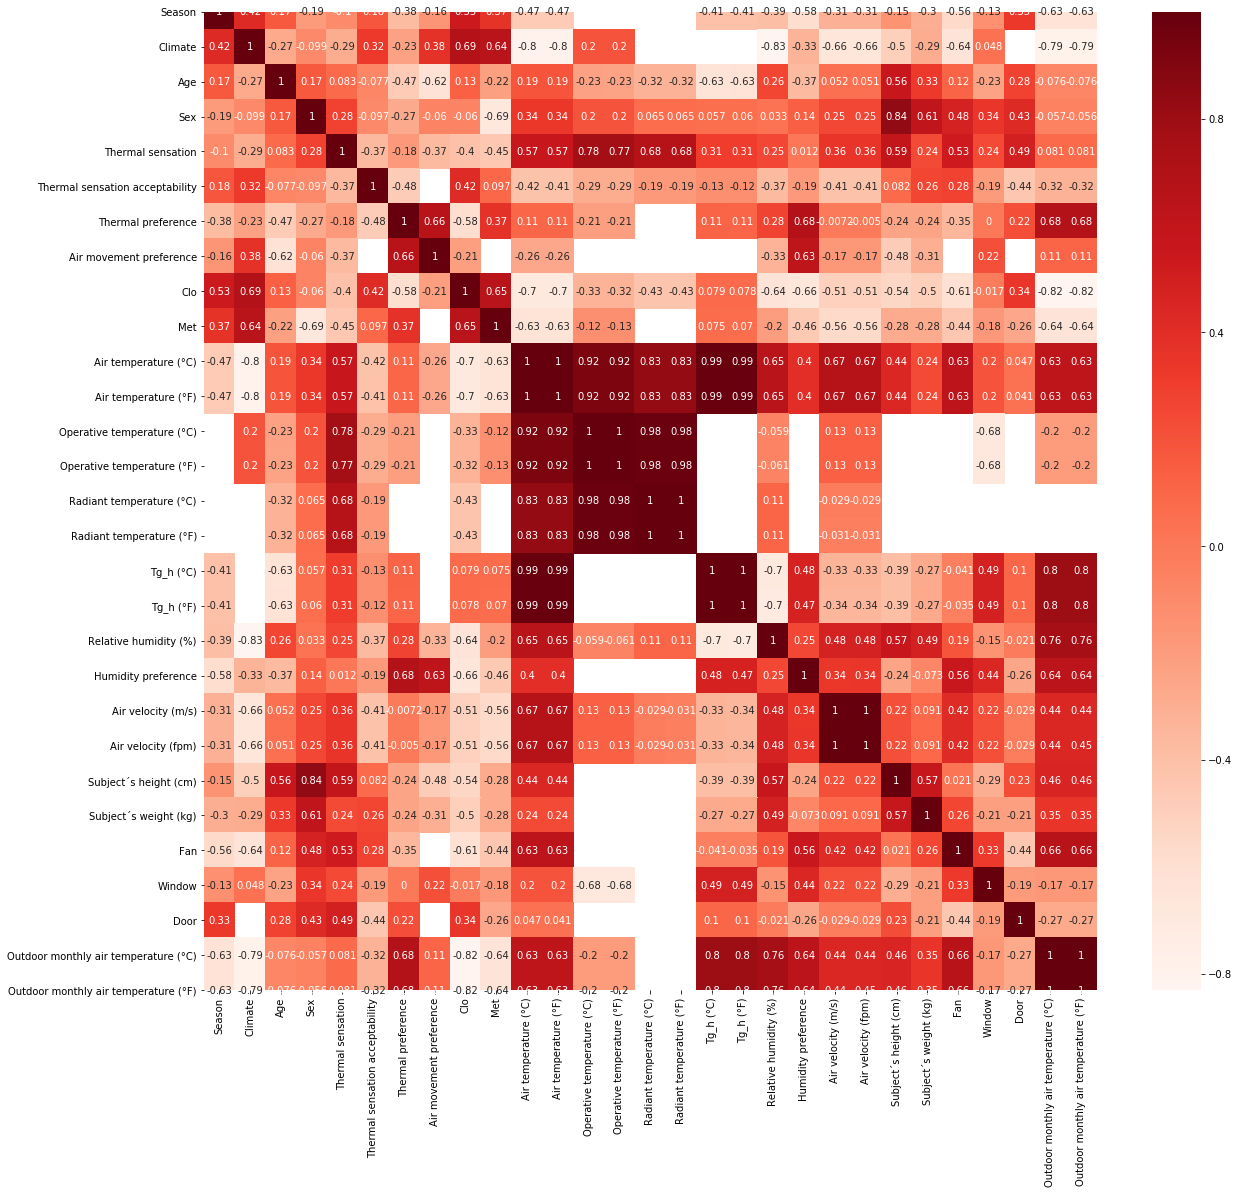

In [70]:
plt.figure(figsize=(20,18))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show() 

In [71]:
#Correlation with output variable
cor_target = abs(cor["Thermal sensation"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features.sort_values(ascending=False)  

Thermal sensation             1.000000
Operative temperature (°C)    0.777762
Operative temperature (°F)    0.773513
Radiant temperature (°F)      0.676417
Radiant temperature (°C)      0.675018
Subject´s height (cm)         0.591140
Air temperature (°C)          0.567154
Air temperature (°F)          0.567107
Fan                           0.525226
Name: Thermal sensation, dtype: float64

In [72]:
#Correlation with output variable
cor_target = abs(cor["Thermal sensation acceptability"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features.sort_values(ascending=False)  

Thermal sensation acceptability    1.0
Name: Thermal sensation acceptability, dtype: float64

In [73]:
#Correlation with output variable
cor_target = abs(cor["Thermal preference"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features.sort_values(ascending=False)  

Thermal preference                      1.000000
Humidity preference                     0.682727
Outdoor monthly air temperature (°C)    0.678404
Outdoor monthly air temperature (°F)    0.678212
Air movement preference                 0.657213
Clo                                     0.583667
Name: Thermal preference, dtype: float64